
# Core concepts in Data Engineering
- Overall picture of data engineering and data science. 
- Data Lake, Data Warehouse, Data Mart
- Data Engineering: ETL, ELT, Data Pipeline, Data Ingestion, Data Integration

# Second Meeting:
- Feature unsupervised discretization and binning:
- Min-max scaling
- Scaling to unit length: L2 norm
- Standardization
- Binning: quantile binning
- Feature supervised discretization using ChiMerge
# Third Meeting:
- Computable feature
- Transformation: log, power transformation
- Box-Cox transformation

# Fourth Meeting:
- Categorical variables:
- Encoding: one-hot, dummy encoding
- Large categorical variables: feature hashing 

## Unsupervised discretization and binning
- Discretization is the process of transforming continuous data into discrete data.
- Binning is the process of transforming continuous data into categorical data.
- Binning is a special case of discretization that deals with continuous data.
- Binning is used to divide the data into bins and then assign a bin label to each data point.

- Binning is used to reduce the complexity of the data and make it easier to analyze.

- Unsupervised discretization is a discretization technique that does not use any labels or target variables.
- Unsupervised discretization is used to divide the data into bins based on the distribution of the data.


## Min-max scaling
- Min-max scaling is a scaling technique that scales the data to a fixed range, usually between 0 and 1.
- The formula for min-max scaling is:
$$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$
where $X_{\text{min}}$ is the minimum value of the feature, $X_{\text{max}}$ is the maximum value of the feature, and $X$ is the original value of the feature.

Min-max scaling is used to scale the data to a fixed range, which can help improve the performance of machine learning algorithms.

## Scaling to unit length: L2 norm
- Scaling to unit length is a scaling technique that scales the data to have a unit length.
- The formula for scaling to unit length is:
$$
X_{\text{scaled}} = \frac{X}{\|X\|}
$$
where $\|X\|$ is the L2 norm of the feature.
- Reason: L2 norm is the Euclidean distance between two points in a multidimensional space.
- L2 formula:
$$
\|X\| = \sqrt{\sum_{i=1}^{n} X_i^2}
$$

## Standardization
- Standardization is a scaling technique that scales the data to have a mean of 0 and a standard deviation of 1.
- The formula for standardization is:
$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$
where $\mu$ is the mean of the feature, $\sigma$ is the standard deviation of the feature, and $X$ is the original value of the feature.

## Binning: quantile binning
- Quantile binning is a binning technique that divides the data into bins based on the quantiles of the data.
- The quantiles are the values that divide the data into equal-sized bins.
- The formula for quantile binning is:
$$
X_{\text{binned}} = \text{quantile}(X, q)
$$
where $X_{\text{binned}}$ is the binned value of the feature, $X$ is the original value of the feature, and $q$ is the quantile value.


## Feature supervised discretization using ChiMerge
- ChiMerge is a supervised discretization technique that uses the chi-square test to merge adjacent bins that have similar distributions.
- The chi-square test is a statistical test that measures the independence between two categorical variables.
- The formula for the chi-square test is:
$$
\chi^2 = \sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i}
$$
where $O_i$ is the observed frequency of the $i$-th category, $E_i$ is the expected frequency of the $i$-th category, and $n$ is the number of categories.
- The chi-square test is used to determine if the observed frequencies are significantly different from the expected frequencies.
- ChiMerge uses the chi-square test to merge adjacent bins that have similar distributions until a stopping criterion is met.

## Datasets for practice
- [Titanic dataset](https://www.kaggle.com/c/titanic/data)
- [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris)
- [Wine dataset](https://archive.ics.uci.edu/ml/datasets/wine)
- [Breast cancer dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic))

## Good references:

- [Working with datasets from python](https://towardsdatascience.com/all-the-datasets-you-need-to-practice-data-science-skills-and-make-a-great-portfolio-74f2eb53b38a)
- [Guide to datasets in python](https://machinelearningmastery.com/a-guide-to-getting-datasets-for-machine-learning-in-python/)

# Working examples in Python

## Intrudcing iris dataset
- The Iris dataset is a classic dataset in machine learning and statistics.
- It is a small dataset that contains 150 samples of iris flowers.
- The dataset contains four features: sepal length, sepal width, petal length, and petal width.
- The target variable is the species of the iris flower, which can be one of three classes: setosa, versicolor, or virginica.

- The dataset is commonly used to demonstrate classification algorithms and clustering algorithms.
- It is originally created by R.A. Fisher in 1936 during his work on the Iris flower.

## Unsupervised discretization and binning 

In [2]:
# Dataset for discretization and binning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Use a well-known dataset managed a python library
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# Summary of the dataset
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# Quality check of the dataset
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [11]:

# Count number of unique values in each column
iris_df.nunique()


sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
species               3
dtype: int64

In [31]:
# Discretize the dataset
# Create the discretizer object
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
# Fit the discretizer
discretizer.fit(iris.data)
# Transform the dataset
iris_discretized = discretizer.transform(iris.data)
iris_discretized = pd.DataFrame(iris_discretized, columns=iris.feature_names)
iris_discretized['species'] = iris_df['species']

# Count the number of points in each bin and save the counts in a new column
iris_discretized['bin size'] = iris_discretized.groupby('petal length (cm)')['petal length (cm)'].transform('size')

iris_discretized.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,bin size
0,0.0,2.0,0.0,0.0,setosa,50
1,0.0,1.0,0.0,0.0,setosa,50
2,0.0,2.0,0.0,0.0,setosa,50
3,0.0,1.0,0.0,0.0,setosa,50
4,0.0,2.0,0.0,0.0,setosa,50


In [32]:
iris_discretized['petal length (cm)'].value_counts()

2.0    61
0.0    50
3.0    28
1.0    11
Name: petal length (cm), dtype: int64

In [40]:
# Double check assignment of bin size
iris_discretized['bin size'].value_counts()

61    61
50    50
28    28
11    11
Name: bin size, dtype: int64

In [33]:
iris_discretized.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),bin size
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.220000,1.286667,1.446667,1.460000,47.506667
std,0.947409,0.735820,1.138330,1.173705,15.700958
min,0.000000,0.000000,0.000000,0.000000,11.000000
25%,0.000000,1.000000,0.000000,0.000000,28.000000
50%,1.000000,1.000000,2.000000,2.000000,50.000000
75%,2.000000,2.000000,2.000000,2.000000,61.000000
max,3.000000,3.000000,3.000000,3.000000,61.000000


In [34]:
iris_discretized.nunique()

sepal length (cm)    4
sepal width (cm)     4
petal length (cm)    4
petal width (cm)     4
species              3
bin size             4
dtype: int64

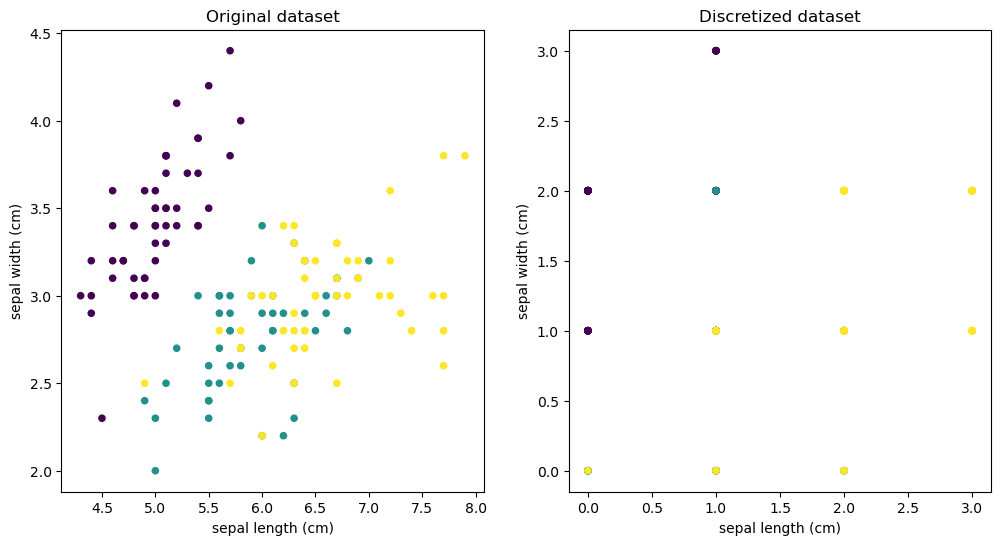

In [22]:
# Plot the dataset before and after discretization

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# fig, and ax are the objects that matplotlib uses to create the plot
# fig is the entire figure, and ax is the individual plot
# ax is a list of the two plots
# subplots(1, 2) creates a figure with 1 row and 2 columns
# figsize is the size of the figure in inches

iris_df.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c=iris.target, cmap='viridis', colorbar=False, ax=ax[0])
# plot.scatter creates a scatter plot
# x and y are the columns to plot
# c is the color of the points, in this case, the target column
# cmap is the color map to use, in this case, viridis. Viridis is a color map that goes from blue to yellow.
# colorbar=False removes the color bar
# ax=ax[0] specifies that the plot should be drawn on the first plot

ax[0].set_title('Original dataset')
# set_title sets the title of the plot
iris_discretized.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c=iris.target, cmap='viridis', colorbar=False, ax=ax[1])
ax[1].set_title('Discretized dataset')
plt.show()


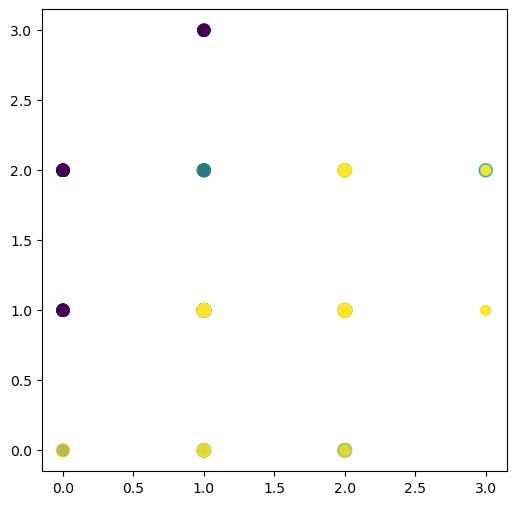

In [38]:
iris_discretized.head()


# Scatter plot of the discretized dataset
# Use different sizes for the points to show the discretization bin size
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
# Create a single plot

# Plot the discretized dataset
sc = ax.scatter(iris_discretized['sepal length (cm)'], iris_discretized['sepal width (cm)'], c=iris.target, cmap='viridis',
                 s=iris_discretized['bin size']*1.5, alpha=0.6)
# sc is the scatter plot object
# s is the size of the points. 
# s can be a single value, in which case all points have the same size, or an array with the same length as the number of points, in which case each point has a different size.
# For example, if s is set to counts of each bin, the points in each bin will have a different size.
# size are multiplied by 1.5 to make them more visible





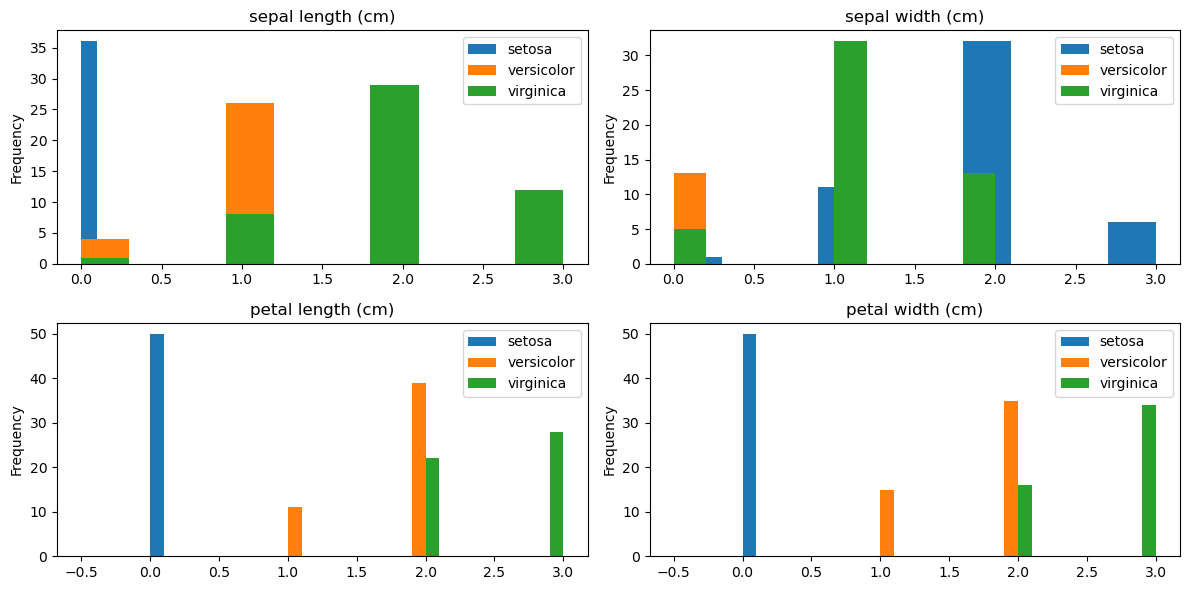

In [41]:
# Plot the dataset
plt.figure(figsize=(12, 6))
# plt.figure creates a new figure
# figsize is the size of the figure in inches

for i, feature in enumerate(iris.feature_names):
    # enumerate returns the index and the value of each element in a list
    # iris.feature_names is a list of the column names of the dataset
    plt.subplot(2, 2, i+1)
    # plt.subplot creates a subplot
    # 2, 2 is the number of rows and columns of the subplot
    # i+1 is the index of the subplot, starting from 1

    iris_discretized.groupby('species')[feature].plot(kind='hist', title=feature, legend=True)
    plt.legend(iris.target_names)
plt.tight_layout()
plt.show()


## Min-max scaling


In [43]:
# Do min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Scaling on specific columns, for example, the first two columns
iris_scaled = iris_df.copy()
iris_scaled.iloc[:, :2] = scaler.fit_transform(iris_df.iloc[:, :2])
iris_scaled.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,0.222222,0.625000,1.4,0.2,setosa
1,0.166667,0.416667,1.4,0.2,setosa
2,0.111111,0.500000,1.3,0.2,setosa
3,0.083333,0.458333,1.5,0.2,setosa
4,0.194444,0.666667,1.4,0.2,setosa


In [44]:
# Scaling on all columns contains word 'width' in the column name
iris_scaled = iris_df.copy()
iris_scaled.loc[:, iris_scaled.columns.str.contains('width')] = scaler.fit_transform(iris_df.loc[:, iris_df.columns.str.contains('width')])
iris_scaled.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,0.625000,1.4,0.041667,setosa
1,4.9,0.416667,1.4,0.041667,setosa
2,4.7,0.500000,1.3,0.041667,setosa
3,4.6,0.458333,1.5,0.041667,setosa
4,5.0,0.666667,1.4,0.041667,setosa


In [45]:
iris_scaled.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
species               3
dtype: int64

## Scaling to unit length: L2 norm

In [49]:
# Do L2 norm scaling
from sklearn.preprocessing import Normalizer
scaler = Normalizer()

# L2 norm scaling on all columns with the exception of the 'species' column. 
iris_scaled = iris_df.copy()
iris_scaled.iloc[:, :-1] = scaler.fit_transform(iris_scaled.iloc[:, :-1])
iris_scaled.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,0.803773,0.551609,0.220644,0.031521,setosa
1,0.828133,0.507020,0.236609,0.033801,setosa
2,0.805333,0.548312,0.222752,0.034269,setosa
3,0.800030,0.539151,0.260879,0.034784,setosa
4,0.790965,0.569495,0.221470,0.031639,setosa
